# ========================================================================================
# 2m_project_6_2
# ========================================================================================

В данном проекте вы поработаете с довольно нетипичными для аналитика данными: gff файлом, который описывает геном мухи (описание формата можно найти здесь). При его выполнении вам может понадобиться часть конспекта про работу со строковыми данными, а именно – про строковые методы серий.

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'F:\!PR\Simulation\data\gff.tsv', sep='\t', comment='#')

In [4]:
df.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   seq_id      512 non-null    object
 1   source      512 non-null    object
 2   type        512 non-null    object
 3   start       512 non-null    int64 
 4   end         512 non-null    int64 
 5   score       512 non-null    object
 6   strand      512 non-null    object
 7   phase       512 non-null    object
 8   attributes  512 non-null    object
dtypes: int64(2), object(7)
memory usage: 36.1+ KB


1.	Выделите из колонки attributes значение атрибута Parent. Т.е. если там записано Parent=x, то нам нужен x. 
2.	Выясните, какое из этих значений является самым частым

In [7]:
pattern = r'Parent=(?P<parent>[\w\.]+)'
parent = df.attributes.str.extract(pattern)
parent.parent.value_counts()

parent
XM_001475631.1    479
NC_000083.5        33
Name: count, dtype: int64

3.	Постройте распределение встречаемости значений в столбце type

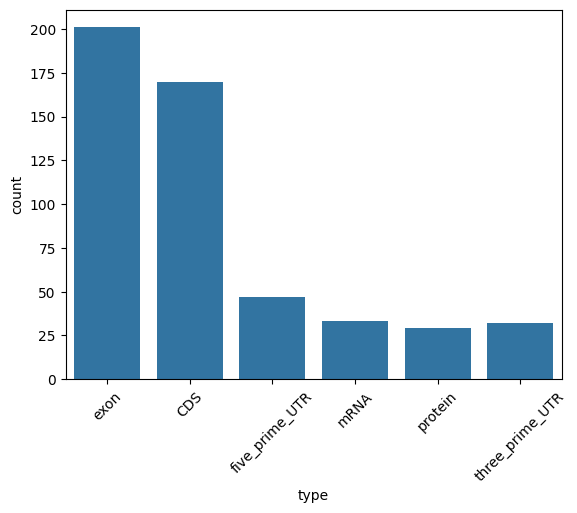

In [15]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='type')
ax.tick_params(axis='x', rotation = 45)